## Exploring Yelp Reviews


In the following sections, we'll explore restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge). The dataset includes Yelp data for user reviews and business information for 10 metropolitan areas, and the city of Charlotte is chosen for the analyses below.

This notebook is broken into two parts:

#### Part 1: testing how well sentiment analysis works.

Because Yelp reviews include the number of stars given by the user, the Yelp data set provides a unique opportunity to test how well our sentiment analysis works by comparing the number of stars to the polarity of reviews.

#### Part 2: analyzing correlations between restaurant reviews and census data

We'll explore geographic trends in the restaurant reviews, comparing our sentiment analysis results with user stars geographically. We'll also overlay review stars on maps of household income (using census data).

## 1. Does Sentiment Analysis Work?

In this part, we'll load the data, perform a sentiment analysis, and explore the results.

### 1.1 Load review data

In [1]:
import pandas as pd

In [2]:
review = pd.read_json('data/reviews_charlotte.json.gz', orient='records', lines=True)

In [3]:
review.head(10)

,business_id,review_id,stars,text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...
5,tjAeaGdxf7I4xN9M7wGJNQ,TaoaX7MqCujFRNaJBns2Sw,5,While the prices are a bit high for a make-you...
6,Z66xO_B7trDah8F0PKwRqg,Pin7lN2A9XzBVpzgq4-wgQ,4,We stopped by for a little shopping. The mall ...
7,d8lmIZIqmBC9oPM8y1dc7Q,xLPt2YOqBTJ1fNwC3bPdOw,3,I've dined here a few times with my family and...
8,e01WELWR6ODCder7onrIlA,qQ5nCAyKPVrYMLQ2TaiOnw,5,Don't let the location or the look of the buil...
9,N2PlDjUJVfOJzsPzY0Au1w,6POnAs_4MijROSKeOevXHQ,3,Not the best part of town. Not particularly g...


### 1.2 Format the review text

Here we will split the review text into its individual words and make all of the words lower-cased, and add a new column called 'formatted_text', which each entry is a list of the lower-cased words in a review.

In [4]:
review['formatted_text'] = review['text'].apply(lambda x: x.lower().split())

In [5]:
review.head()

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,"[such, a, unique, place, &, a, great, find., o..."
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,"[easily, entering, my, top, 3, restaurants, in..."
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,"[this, random, hole, in, the, wall, is, locate..."
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,"[yum!!, had, the, kale, grits, and, would, def..."
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...,"[overall, the, food, is, really, good., we, ha..."


### 1.3 Review stop words

We'll use the `nltk` library to remove any stop words from the list of words in each review. 

In [6]:
import nltk
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MaiRZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [8]:
def remove_stopwords(lst):
    return [word for word in lst if word not in stop_words]


review['formatted_text'] = review['formatted_text'].apply(remove_stopwords)

In [9]:
review.head()

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,"[unique, place, &, great, find., waitress, fun..."
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,"[easily, entering, top, 3, restaurants, charlo..."
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,"[random, hole, wall, located, park, rd., shopp..."
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,"[yum!!, kale, grits, would, definitely, again!..."
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...,"[overall, food, really, good., bruschetta, see..."


### 1.4 Calculate polarity and subjectivity

Using the formatted text column, we'll create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`.

In [10]:
import textblob

In [11]:
texts = review['formatted_text'].apply(lambda x : " ".join(x))

blobs = [textblob.TextBlob(text) for text in texts]

In [12]:
review['polarity'] = [b.sentiment.polarity for b in blobs]
review['subjectivity'] = [b.sentiment.subjectivity for b in blobs]

In [13]:
review.head()

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,"[unique, place, &, great, find., waitress, fun...",0.404167,0.841667
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,"[easily, entering, top, 3, restaurants, charlo...",0.609896,0.683333
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,"[random, hole, wall, located, park, rd., shopp...",0.332738,0.521032
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,"[yum!!, kale, grits, would, definitely, again!...",0.418750,0.750000
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...,"[overall, food, really, good., bruschetta, see...",0.274524,0.517540


### 1.5 Comparing the sentiment analysis to number of stars 

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Number of Stars vs. Polarity')

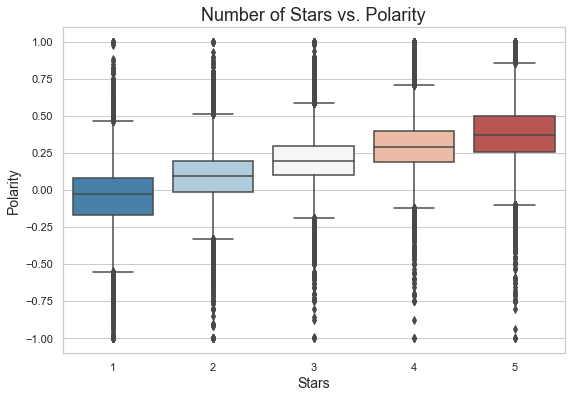

In [15]:
sns.set(style = "whitegrid", palette = "pastel", color_codes = True)

sns.boxplot(x='stars', y='polarity', data=review, palette='RdBu_r')

fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.xlabel('Stars', fontsize=14)
plt.ylabel('Polarity', fontsize=14)
plt.title('Number of Stars vs. Polarity', fontsize=18)

Text(0.5, 1.0, 'Number of Stars vs. Subjectivity')

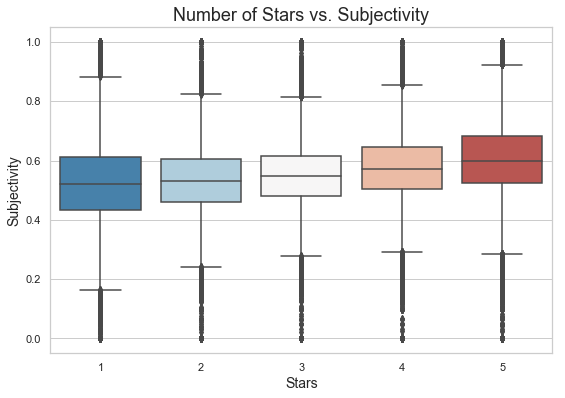

In [16]:
sns.set(style = "whitegrid", palette = "pastel", color_codes = True)

sns.boxplot(x='stars', y='subjectivity', data=review, palette='RdBu_r')

fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.xlabel('Stars', fontsize=14)
plt.ylabel('Subjectivity', fontsize=14)
plt.title('Number of Stars vs. Subjectivity', fontsize=18)

> The first box plot indicates that on average, polarity of reviews with higher number of stars tends to be closer to 1. In this sense, our sentiment analysis is effective. In the second box plot, the overall subjectivities of the first three boxes are basically the same, while the ones of the other two are a bit higher. The sentiment analysis does not perform well in this case, since we would expect reviews with 1 and 5 stars are more likely to be subjective.

### 1.6 The importance of individual words

In this part, we'll explore the importance and frequency of individual words in Yelp reviews.

We will identify the most common reviews and then plot the average polarity vs. the user stars for the reviews where those words occur. 

#### 1.6.1 Select a random sample of the review data

In [17]:
review_subset = review.sample(n=1000, random_state=666).reset_index(drop=True)

review_subset.head()

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
0,nPJqwNZWIxHd-vfE-E3XQQ,NClytSaVs33PG_0OwODssw,3,Went here for lunch and it was very good. I ha...,"[went, lunch, good., chicken, red, curry, medi...",-0.120000,0.443333
1,mOMeDQB8NjdBTTzKtikAYg,H1PGbHGImoPEwhJ4ZE4GNQ,2,The restaurant is really confusing. The layout...,"[restaurant, really, confusing., layout, stran...",0.258333,0.606481
2,Uftnd7njdHNFxhz_6rpUrA,OAvrmttTkwh5cyEK9gogyQ,4,Great atmosphere! The food is always great. Th...,"[great, atmosphere!, food, always, great., ser...",0.600000,0.500000
3,dk7VpR5Xh7t28U99ASZz7A,6b0GhG5HYG48ubnYOnrKYw,4,My girlsfriends and I tried this place out las...,"[girlsfriends, tried, place, last, night, part...",0.105357,0.610623
4,8rIDfnWHSo-K0Xb9Y1gjrA,rLi7bNsDOFZnoLDVm5GgAA,4,First stamp on my EatWorkPlay Charlotte food p...,"[first, stamp, eatworkplay, charlotte, food, p...",0.175735,0.532843


#### 1.6.2 Re-format the data

In [18]:
def reshape_data(review_subset):
    """
    Reshape the input dataframe of review data.
    """
    from pandas import Series, merge
    
    X = (review_subset['formatted_text']
         .apply(Series)
         .stack()
         .reset_index(level=1, drop=True)
         .to_frame('word'))
    
    
    R = review_subset[['polarity', 'stars', 'review_id']]
    
    return merge(R, X, left_index=True, right_index=True).reset_index(drop=True)

In [19]:
reshaped_review_subset = reshape_data(review_subset)

In [20]:
reshaped_review_subset.head()

,polarity,stars,review_id,word
0,-0.12,3,NClytSaVs33PG_0OwODssw,went
1,-0.12,3,NClytSaVs33PG_0OwODssw,lunch
2,-0.12,3,NClytSaVs33PG_0OwODssw,good.
3,-0.12,3,NClytSaVs33PG_0OwODssw,chicken
4,-0.12,3,NClytSaVs33PG_0OwODssw,red


#### 1.6.3 Calculate the average number of stars and polarity for each word

In [21]:
words = reshaped_review_subset.groupby('word').agg({'word':'size', 'stars':'mean', 'polarity':'mean'}).\
rename(columns={'word':'size', 'stars':'avg_stars', 'polarity':'avg_polarity'}).reset_index().sort_values('size', ascending=False)

In [22]:
words.head()

,word,size,avg_stars,avg_polarity
4916,food,612,3.281046,0.211581
8592,place,422,3.568720,0.225841
5317,good,401,3.600998,0.280631
5401,great,363,4.146006,0.367064
6702,like,354,3.214689,0.159704


#### 1.6.4 Select words the occur at least 50 times in reviews

In [23]:
words = words[words['size']>=50].reset_index(drop=True)

In [24]:
words.tail()

,word,size,avg_stars,avg_polarity
167,stars,51,3.705882,0.206484
168,shrimp,51,3.549020,0.224760
169,put,50,3.540000,0.162259
170,ask,50,2.780000,0.106627
171,manager,50,2.460000,0.120986


#### 1.6.5 Plot the average polarity vs user stars

Text(0.5, 1.0, 'Average polarity vs. user stars of each word')

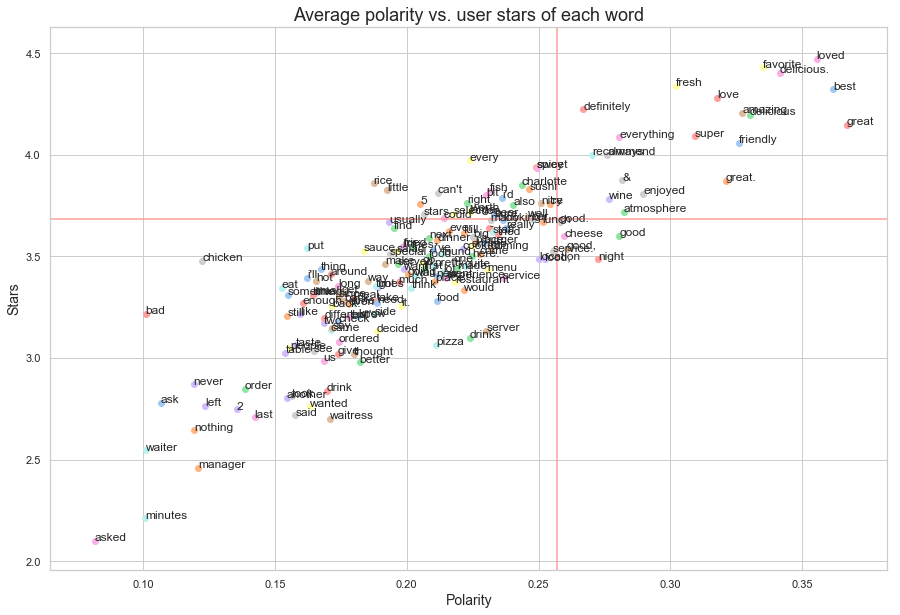

In [25]:
for index, row in words.iterrows():
    plt.scatter(row['avg_polarity'], row['avg_stars'])
    plt.text(row['avg_polarity'], row['avg_stars'], row['word'])
    
plt.axhline(y=review['stars'].mean(), color='r', linestyle='-')
plt.axvline(x=review['polarity'].mean(), color='r', linestyle='-')  
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Stars', fontsize=14)
plt.title('Average polarity vs. user stars of each word', fontsize=18)

## 2. Correlating restaurant data and household income

In this part, we'll use the census API to download household income data and overlay restaurant locations.

### 2.1 Query the Census API

The FIPS codes for Charlotte is: 

- Charlotte
    - NC code: '37'
    - City code: '12000'

In [26]:
from census_area import Census

In [27]:
api_key = "255a51f73d58748349753b3fff308a5637e5a854"
c = Census(key=api_key)

In [28]:
NC_code = 37
charlotte_code = 12000

In [29]:
variables = ('NAME', 'B19013_001E')
income_tracts = c.acs5.state_place_tract(variables, NC_code,
                                         charlotte_code, 
                                         return_geometry=True)

### 2.2 Convert the GeoJSON features to a GeoDataFrame

In [30]:
import geopandas as gpd

In [31]:
crs = {'init':'epsg:4269'}
income_df = gpd.GeoDataFrame.from_features(income_tracts, crs=crs)

In [32]:
income_df.describe()

,AREALAND,AREAWATER,B19013_001E,OBJECTID,OID,STGEOMETRY.AREA,STGEOMETRY.LEN
count,2.030000e+02,2.030000e+02,2.030000e+02,203.000000,2.030000e+02,2.030000e+02,203.000000
mean,4.834717e+06,8.365264e+04,-9.789340e+06,29951.177340,1.366992e+14,7.384180e+06,12071.943587
std,4.107753e+06,3.876242e+05,8.064961e+07,20848.021448,9.086149e+13,6.570887e+06,4902.489295
min,4.788560e+05,0.000000e+00,-6.666667e+08,448.000000,2.075542e+13,7.252377e+05,3541.589122
25%,2.289150e+06,1.377000e+03,3.821000e+04,10306.500000,2.075542e+13,3.441658e+06,8774.955812
50%,3.712217e+06,1.542700e+04,5.914600e+04,30207.000000,2.075537e+14,5.576318e+06,11242.895926
75%,5.784501e+06,4.692800e+04,7.949000e+04,45255.500000,2.075537e+14,8.707632e+06,14626.455086
max,3.561539e+07,3.832112e+06,2.112500e+05,70272.000000,2.075537e+14,5.923239e+07,44046.723166


In [33]:
income_df = income_df[income_df['B19013_001E']>=0]

## 2.3 Plot a choropleth map of the household income

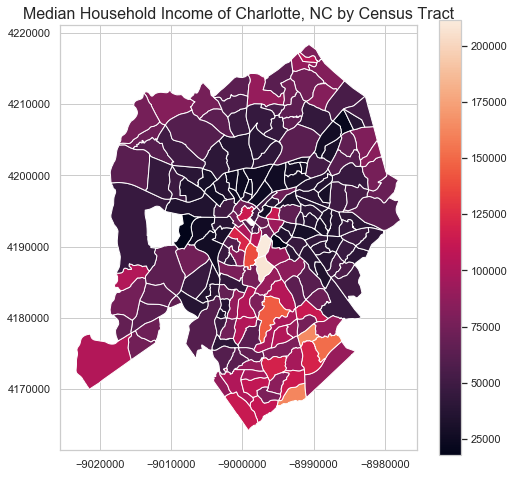

In [34]:
ax = income_df.to_crs(epsg=3857).plot(column='B19013_001E', legend=True)

ax.set_title("Median Household Income of Charlotte, NC by Census Tract", fontsize=16)
ax.figure.set_size_inches((8,8))

## 2.4 Load the restaurants data

In [35]:
restaurants = pd.read_json('data/restaurants_charlotte.json.gz', orient='records', lines=True)

In [36]:
restaurants['Coordinates'] = list(zip(restaurants['longitude'], restaurants['latitude']))

from shapely.geometry import Point
restaurants['Coordinates'] = restaurants['Coordinates'].apply(Point)

restaurants = gpd.GeoDataFrame(restaurants, geometry='Coordinates', crs={'init': 'epsg:4326'})

In [37]:
restaurants.head()

,business_id,latitude,longitude,name,review_count,stars,Coordinates
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-80.859132 35.092564)
1,BvYU3jvGd0TJ7IyZdfiN2Q,35.156338,-80.831878,Manzetti's Tavern,16,3.5,POINT (-80.831878 35.156338)
2,_J_x_RaYTqAqAuCwgRhnRQ,35.172028,-80.746801,Kabob House,15,3.0,POINT (-80.746801 35.172028)
3,U3kygJOTlTQFlfaZS7sQjA,35.199798,-80.842295,JJ's Red Hots - Dilworth,380,4.0,POINT (-80.842294693 35.1997979674)
4,CsLQLiRoafpJPJSkNX2h5Q,35.194894,-80.767442,Middle East Deli,5,3.0,POINT (-80.767442 35.194894)


## 2.5 Overlay restaurants on the income map

In [38]:
income_df_3857 = income_df.to_crs(epsg=3857)

restaurants_3857 = restaurants.to_crs(epsg=3857)

In [39]:
[xmin, ymin, xmax, ymax] = income_df_3857.geometry.total_bounds

Text(0.5, 1.0, 'Charlotte, NC')

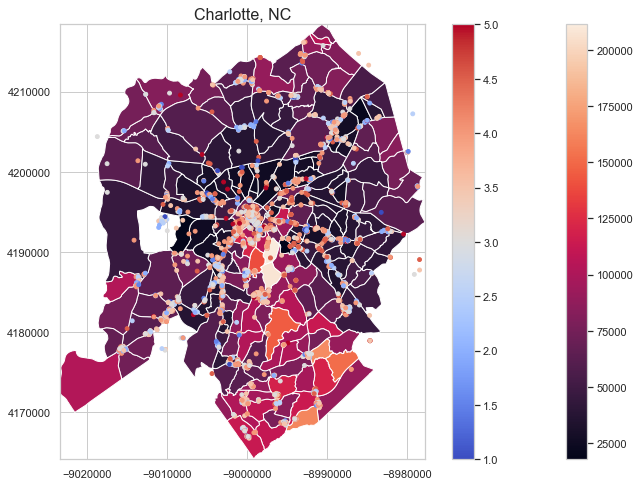

In [66]:
fig, ax = plt.subplots(figsize  = (12, 8))

income_df_3857.plot(column='B19013_001E', ax=ax, legend=True)
restaurants_3857.plot(column='stars', cmap='coolwarm', markersize=15, ax=ax, legend=True)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_title("Charlotte, NC", fontsize=16)

## 2.6 Comparing polarity vs. stars geographically

In [41]:
restaurants_reviews = restaurants_3857.merge(review, on='business_id', how='outer')

In [42]:
restaurants_reviews.head()

,business_id,latitude,longitude,name,review_count,stars_x,Coordinates,review_id,stars_y,text,formatted_text,polarity,subjectivity
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),F7POrJsNbhu493DSTMPXjw,2,"Husband was craving Chicken Teriyaki & gyoza, ...","[husband, craving, chicken, teriyaki, &, gyoza...",0.040179,0.697619
1,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),c-6aA9Bd7JxpmMroRoas9A,4,Went there Saturday noon they open at 12pm but...,"[went, saturday, noon, open, 12pm, people, wai...",0.300000,0.441667
2,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),P_MV_lMQjLIO9R7M_KIuMg,2,Went to this restaurant on Saturday as I had a...,"[went, restaurant, saturday, craving, japanese...",0.154605,0.439474
3,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),dCLBdXP9tjjQG7EkHNeWzQ,5,This place will always have a place in my stom...,"[place, always, place, stoma....errr...heart.,...",0.177689,0.496750
4,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),GiBx0zRVxC1Bu-9R-MMF8w,4,"Well first time I've really had ""authentic"" Ja...","[well, first, time, i've, really, ""authentic"",...",0.091250,0.573333


In [43]:
import cartopy.crs as ccrs
import numpy as np

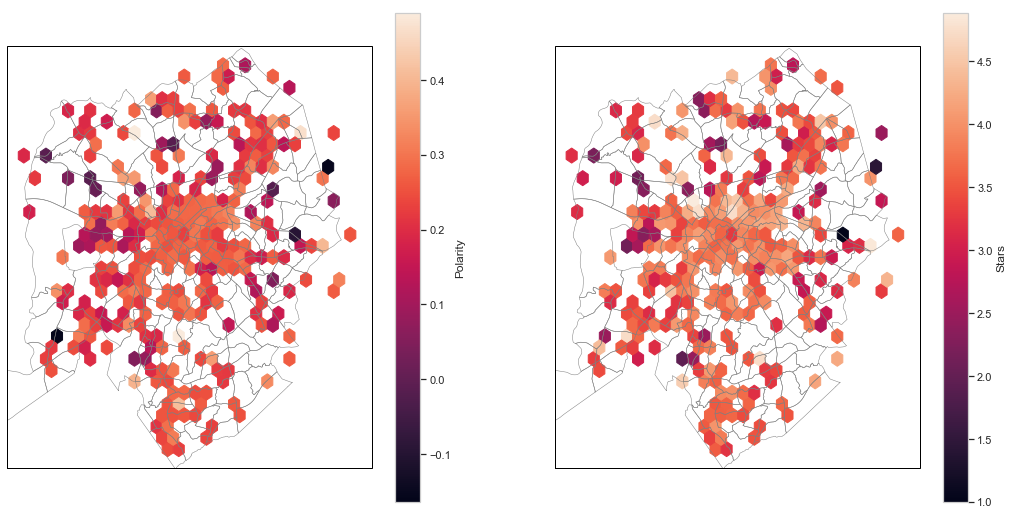

In [44]:
crs_epsg = ccrs.epsg('3857')

# Generate a figure with two axes
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': crs_epsg},
                        figsize=(18, 9))

# Make the First CartoPy plot
axs[0].add_geometries(income_df_3857.geometry, crs=crs_epsg, facecolor='none', edgecolor='grey', linewidth=0.5)

# Make the First Hexbin
hb = axs[0].hexbin(restaurants_reviews.geometry.x, restaurants_reviews.geometry.y, 
                   C=restaurants_reviews.polarity, reduce_C_function = np.mean, 
                   gridsize=30)

# Set Colorbar
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('Polarity')


# Make the Second CartoPy plot
axs[1].add_geometries(income_df_3857.geometry, crs=crs_epsg, facecolor='none', edgecolor='grey', linewidth=0.5)

# Make the Second Hexbin
hb = axs[1].hexbin(restaurants_reviews.geometry.x, restaurants_reviews.geometry.y, 
                   C=restaurants_reviews.stars_y, reduce_C_function = np.mean, 
                   gridsize=30)
# Set Colorbar
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('Stars')